In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [23]:
file_path = r"C:\Users\Danie\OneDrive\Escritorio\Workshop03\data\merged.csv"
df = pd.read_csv(file_path)

### Dataset general

In [24]:
display(df.head())
print("\nShape:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())
print("\nPaíses únicos:", df['country'].nunique())

,country,year,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957



Shape: (782, 9)

Tipos de datos:
 country             object
year                 int64
happiness_score    float64
gdp_per_capita     float64
social_support     float64
life_expectancy    float64
freedom            float64
generosity         float64
corruption         float64
dtype: object

Valores nulos por columna:
 country            0
year               0
happiness_score    0
gdp_per_capita     0
social_support     0
life_expectancy    0
freedom            0
generosity         0
corruption         0
dtype: int64

Países únicos: 169


### Estadística Descriptiva

In [25]:
display(df.describe())

,year,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,2016.993606,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125392
std,1.417364,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105756
min,2015.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054250
50%,2017.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000
75%,2018.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.155861
max,2019.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910


### Distribución de Happiness Score

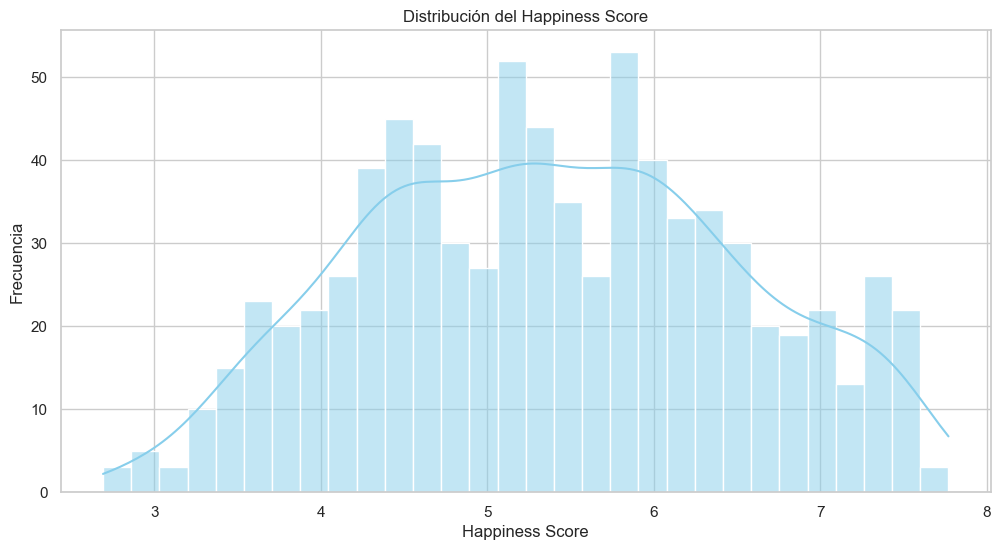

In [26]:
sns.histplot(df['happiness_score'], kde=True, bins=30, color="skyblue")
plt.title("Distribución del Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frecuencia")
plt.show()

### Evolución Media por Año

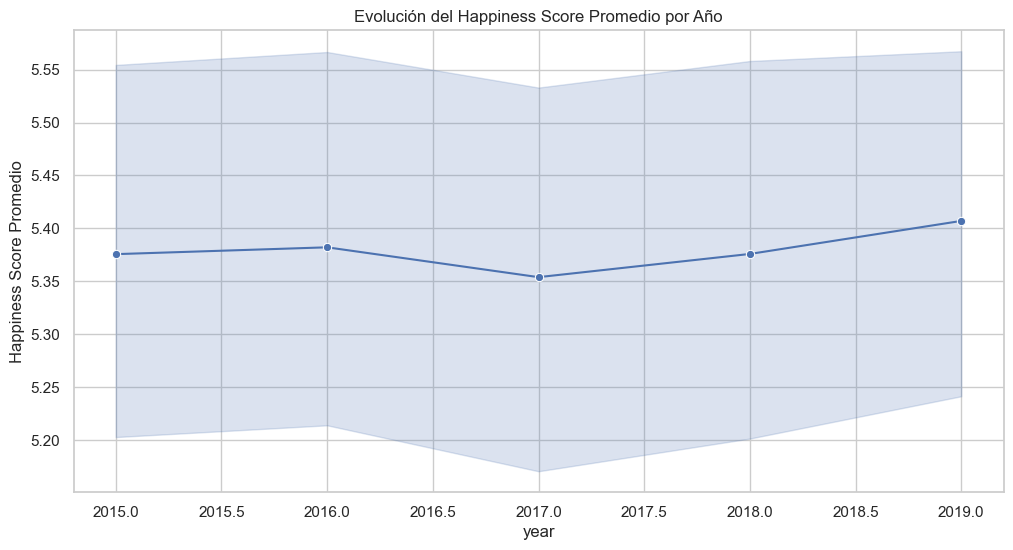

In [27]:
sns.lineplot(data=df, x="year", y="happiness_score", estimator='mean', marker='o')
plt.title("Evolución del Happiness Score Promedio por Año")
plt.ylabel("Happiness Score Promedio")
plt.show()

### Países más felices y menos felices en promedio

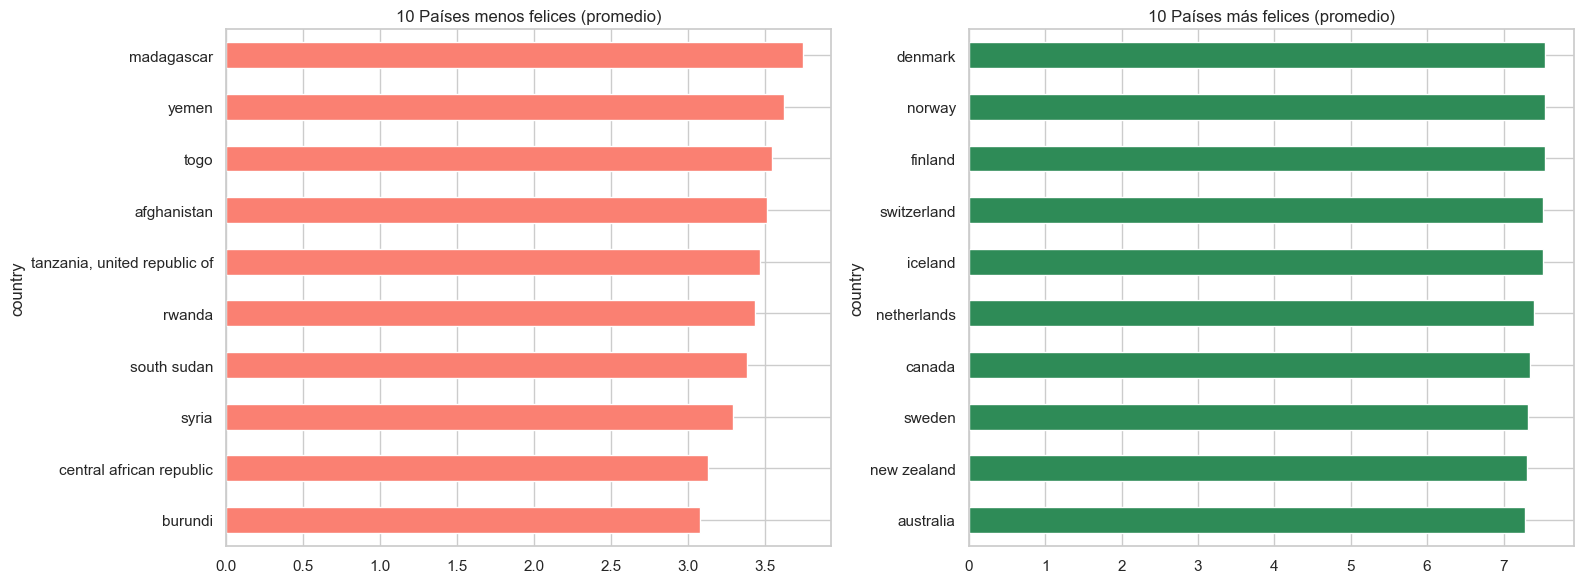

In [28]:
avg_score = df.groupby("country")["happiness_score"].mean().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

avg_score.head(10).plot(kind="barh", ax=ax[0], color="salmon")
ax[0].set_title("10 Países menos felices (promedio)")

avg_score.tail(10).plot(kind="barh", ax=ax[1], color="seagreen")
ax[1].set_title("10 Países más felices (promedio)")

plt.tight_layout()
plt.show()

### Correlación entre variables numéricas

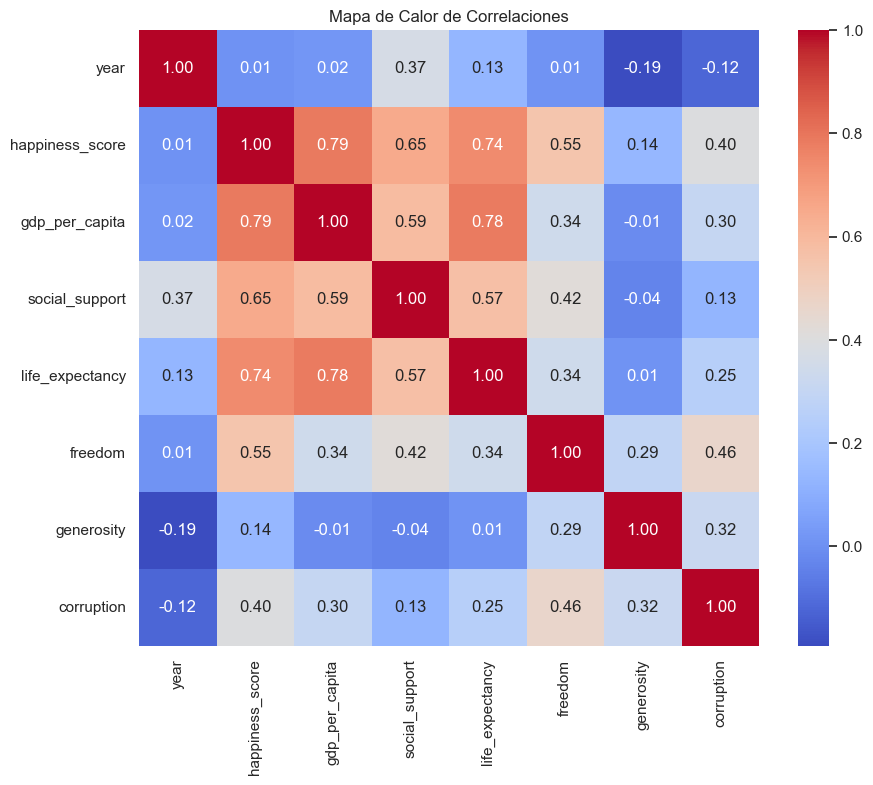

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

### Relaciones clave con Happiness Score

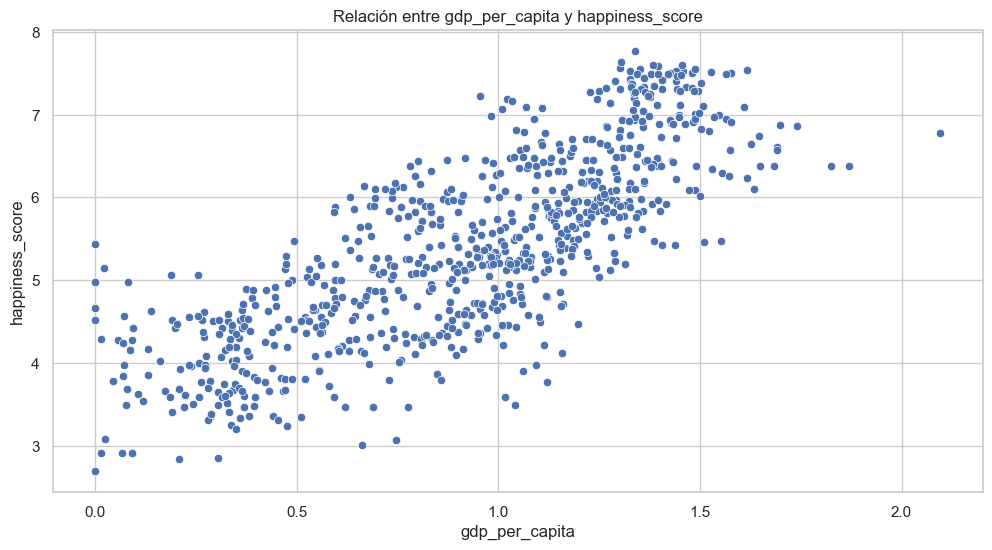

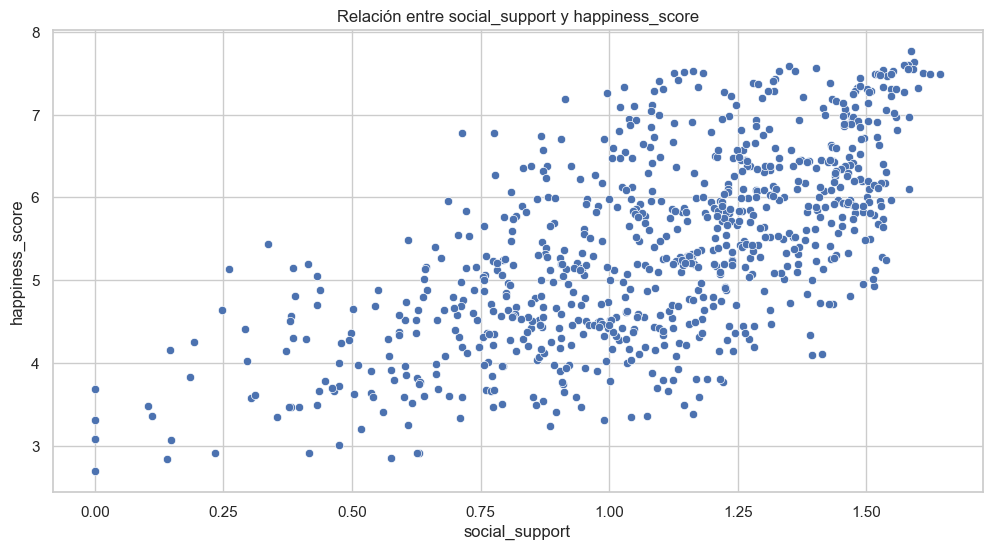

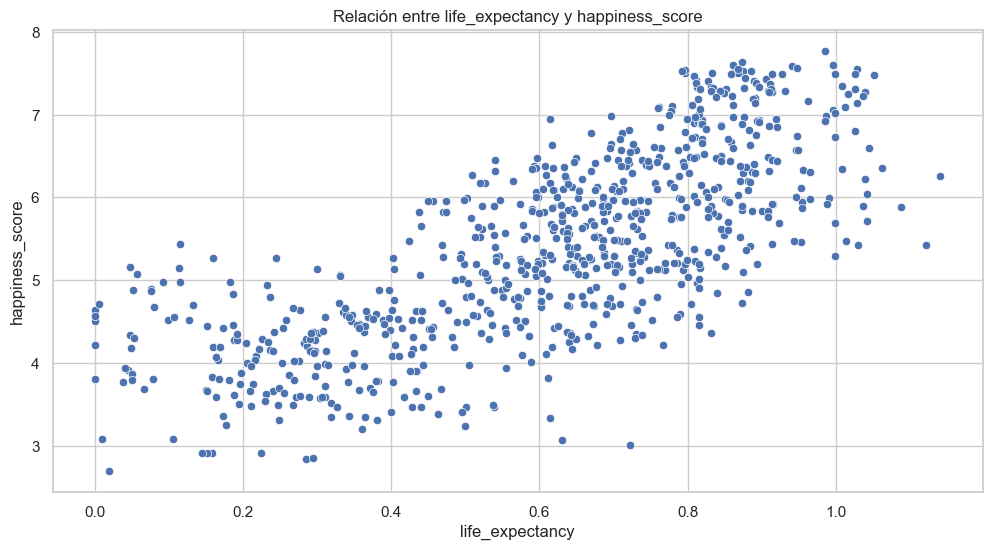

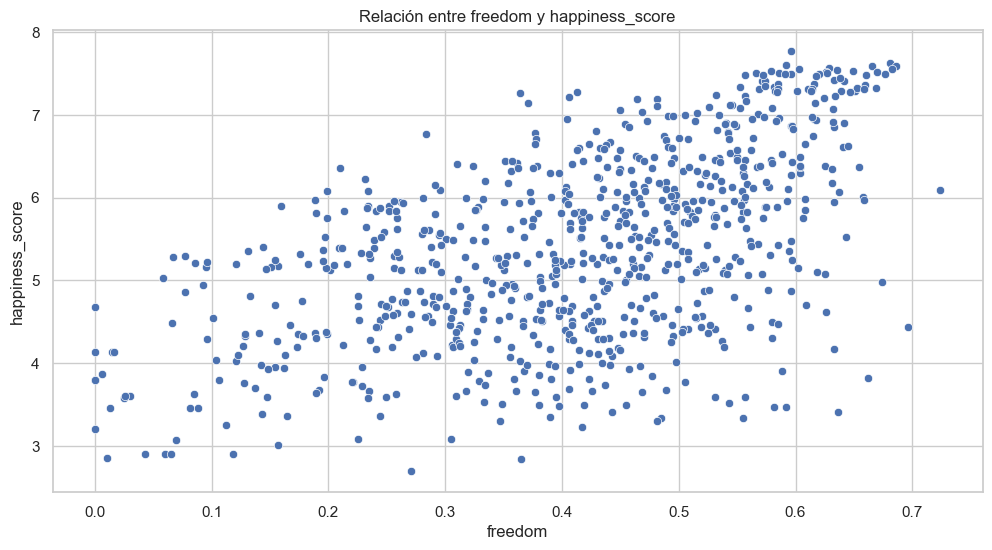

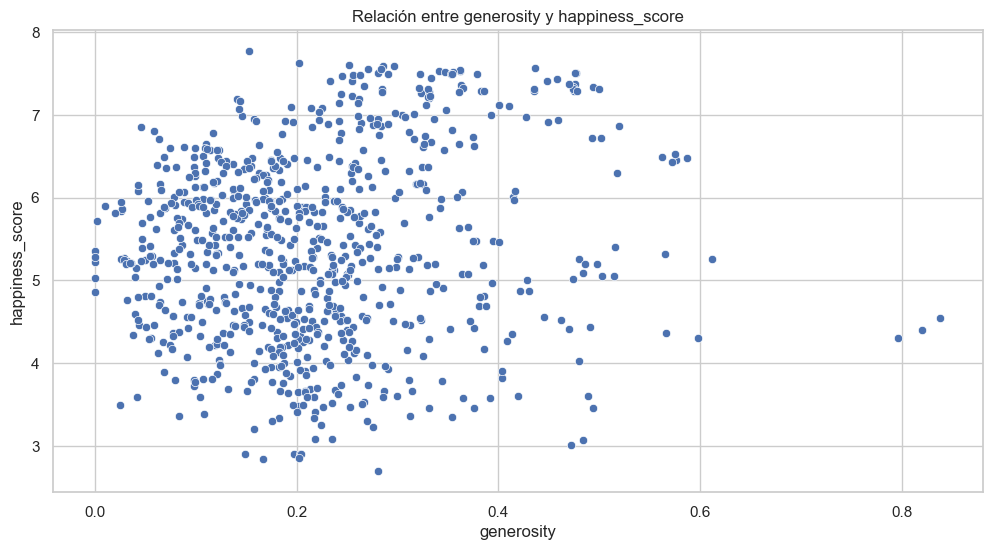

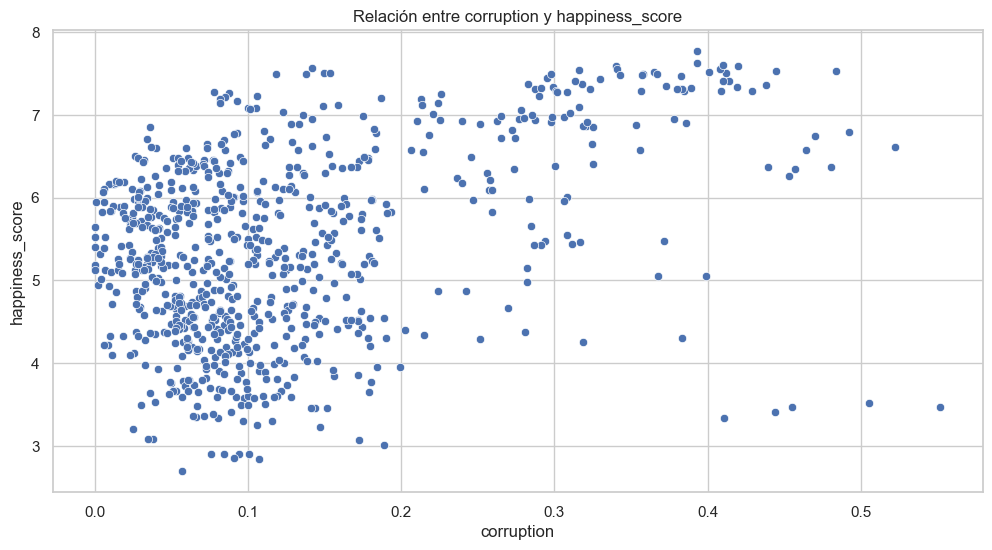

In [ ]:
features = ["gdp_per_capita", "social_support", "life_expectancy", "freedom", "generosity", "corruption"]

for feature in features:
    sns.scatterplot(data=df, x=feature, y="happiness_score")
    plt.title(f"Relación entre {feature} y happiness_score")
    plt.show()

### Boxplots por año

C:\Users\Danie\AppData\Local\Temp\ipykernel_20440\2053697495.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="year", y="happiness_score", palette="Set3")


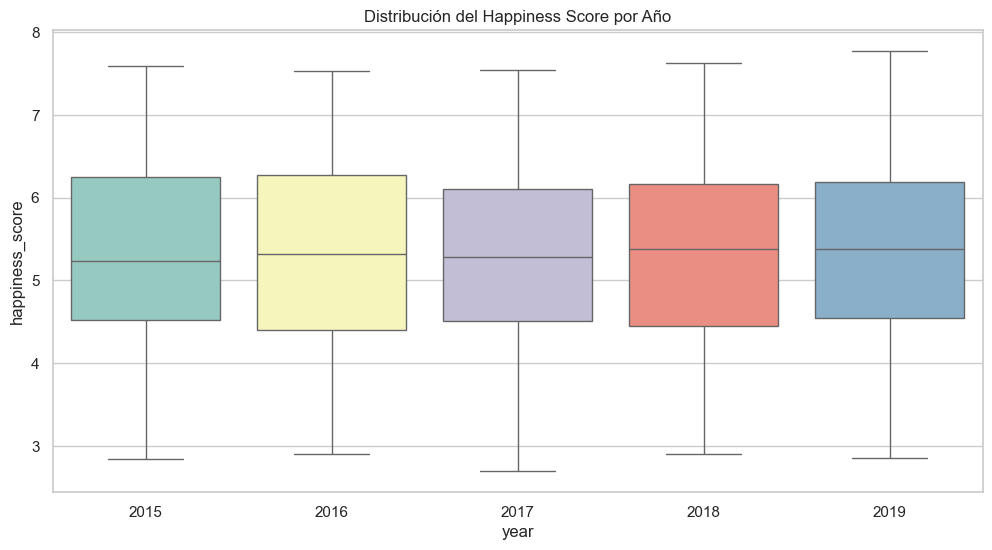

In [31]:
sns.boxplot(data=df, x="year", y="happiness_score", palette="Set3")
plt.title("Distribución del Happiness Score por Año")
plt.show()

#### Conclusiones del EDA (Exploratory Data Analysis)
1. Correlación entre variables
Las variables que presentan alta correlación positiva con el happiness_score son:

- `gdp_per_capita` (0.79)

- `life_expectancy` (0.74)

- `social_support` (0.65)

Estas tres variables representan los componentes socioeconómicos más determinantes para el nivel de felicidad percibida en un país.

Variables como `freedom` (0.55) y `corruption` (0.40) también presentan correlaciones relevantes, aunque menores.

2. Relaciones clave visuales
Se observan relaciones lineales claras en los scatter plots de:

- `gdp_per_capita`, `life_expectancy`, y `social_support` → fuerte dispersión ascendente.

La relación con `freedom` es positiva pero más dispersa.

`generosity` y `corruption` presentan relaciones menos evidentes y más ruidosas, pero en algunos casos ayudan como modificadores de otras variables

3. Distribución por año (boxplots)
- La distribución del `happiness_score` es estable entre años, sin cambios abruptos.

- A partir de 2018 se percibe una leve tendencia al alza en el valor promedio de felicidad global.

- No hay outliers extremos ni anomalías temporales, lo que sugiere coherencia entre las muestras de cada año.

4. Conclusión general del EDA
- El `happiness_score` está fuertemente determinado por condiciones económicas y sociales.

- La estabilidad en la distribución por año valida que el dataset está bien balanceado temporalmente.

- La distribución del happiness_score por año es estable y no presenta cambios abruptos, lo que sugiere que la felicidad percibida es un fenómeno relativamente constante en el tiempo

